In [228]:
# Librerias necesarias para hacer un EDA optimo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
from cargar_datos import cargar_datos
import warnings

warnings.filterwarnings('ignore')

In [229]:
# Importamos los datos obtenidos de nuestro script
df = cargar_datos()
df.head(5)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [230]:
# Creamos las funciones que vamos a utilizar a lo largo del notebook

# Para evitar usar notacion Cientifica creamos un formateador y usando Ticker de matplotlib cambiamos los valores 
def millions_formatter(x, pos):
    """
    Cambiamos el formato para un valor espcifico en este caso Millones (M) para los ejes de Matplotlib.

    Parámetros:
    -----------
    x : float
        El valor numérico de la posición actual del 'tick' (marca) en el eje. 
        Ejemplo: 5000000
    pos : int
        La posición relativa o índice de la marca en el eje (0, 1, 2...). 
        Requerido por FuncFormatter aunque no siempre se use en la lógica.

    Si x = 2,500,000, la función retorna '2.5M'.
    """
    return f'{x/1e6:g}M' # Para millones usamos 1e6

In [231]:
###### INFO ######
print("Informacion del Dataframe \n")
display(df.info())

Informacion del Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64

None

In [232]:
#### DESCRIBE ####
print("Describe del Dataframe \n")
display(df.describe().T)

Describe del Dataframe 



,count,mean,min,25%,50%,75%,max,std
tipo_credito,10763.0,5.411131,4.0,4.0,4.0,9.0,68.0,2.338279
fecha_prestamo,10763,2025-04-16 23:06:02.111121664,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN
capital_prestado,10763.0,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997
plazo_meses,10763.0,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082
edad_cliente,10763.0,43.94862,19.0,33.0,42.0,53.0,123.0,15.060877
salario_cliente,10763.0,17216431.459909,0.0,2000000.0,3000000.0,4875808.0,22000000000.0,355476717.603482
total_otros_prestamos,10763.0,6238869.648518,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118418316.941069
cuota_pactada,10763.0,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608
puntaje,10763.0,91.170036,-38.00999,95.227787,95.227787,95.227787,95.227787,16.465441
puntaje_datacredito,10757.0,780.790834,-7.0,757.0,791.0,825.0,999.0,104.878031


In [233]:
###### SHAPE #####
print("Shape del Dataframe: ", df.shape)

Shape del Dataframe:  (10763, 23)


In [234]:
### DUPLICADOS ###
print("Duplicados dentro del Dataframe: ", df.duplicated().sum())

Duplicados dentro del Dataframe:  0


In [235]:
###### NULOS ######
print("Nulos del Dataframe: \n")
print(df.isnull().sum())

Nulos del Dataframe: 

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64


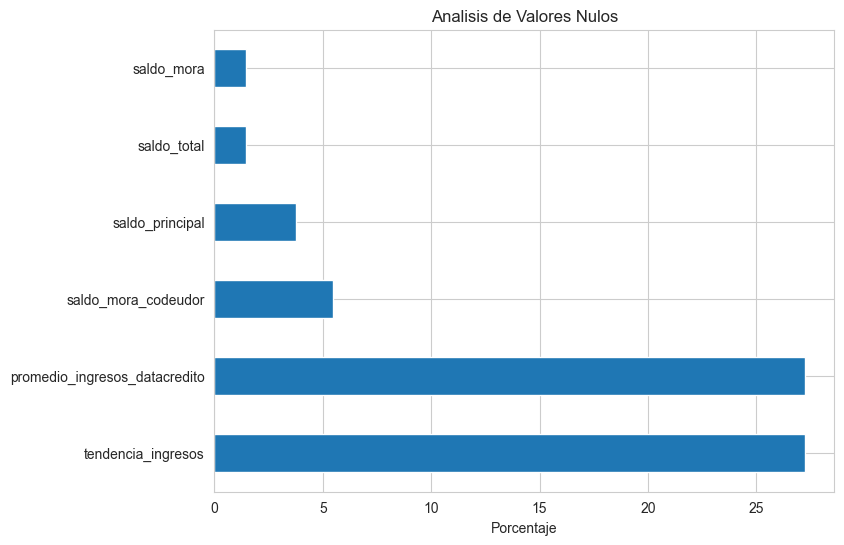

In [236]:
# Vamos a hacer un analisis sobre las variables que tienen valores nulos
features_nulos = ['saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'promedio_ingresos_datacredito', 'tendencia_ingresos']

(df[features_nulos].isna().mean()*100).sort_values(ascending=False).plot(kind='barh', figsize=(8,6))

plt.title("Analisis de Valores Nulos")
plt.xlabel("Porcentaje")
plt.show()

In [237]:
media_ingresos_datacredito = df['promedio_ingresos_datacredito'].mean()
media_saldo_mora_codeudor = df['saldo_mora_codeudor'].mean()

moda_tendencia_ingresos = df['tendencia_ingresos'].mode()
print(moda_tendencia_ingresos)

df.fillna({'promedio_ingresos_datacredito':media_ingresos_datacredito}, inplace=True)
df.fillna({'saldo_mora_codeudor':media_saldo_mora_codeudor}, inplace=True)
df.fillna({'tendencia_ingresos':'Creciente'}, inplace=True)
df.dropna(subset=['saldo_mora', 'saldo_total', 'saldo_principal'], inplace=True)

0    Creciente
Name: tendencia_ingresos, dtype: object


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10358 non-null  int64         
 1   fecha_prestamo                 10358 non-null  datetime64[ns]
 2   capital_prestado               10358 non-null  float64       
 3   plazo_meses                    10358 non-null  int64         
 4   edad_cliente                   10358 non-null  int64         
 5   tipo_laboral                   10358 non-null  object        
 6   salario_cliente                10358 non-null  int64         
 7   total_otros_prestamos          10358 non-null  int64         
 8   cuota_pactada                  10358 non-null  int64         
 9   puntaje                        10358 non-null  float64       
 10  puntaje_datacredito            10358 non-null  float64       
 11  cant_creditosvigente

## Manejo de Outliers

Los outliers son valores atípicos que se encuentran significativamente alejados del resto de los datos en un conjunto. Estos pueden afectar negativamente el análisis estadístico y los modelos predictivos. A continuación, se hace el manejo de Outliers haciendo uso de Python y la biblioteca Pandas.

### EDAD

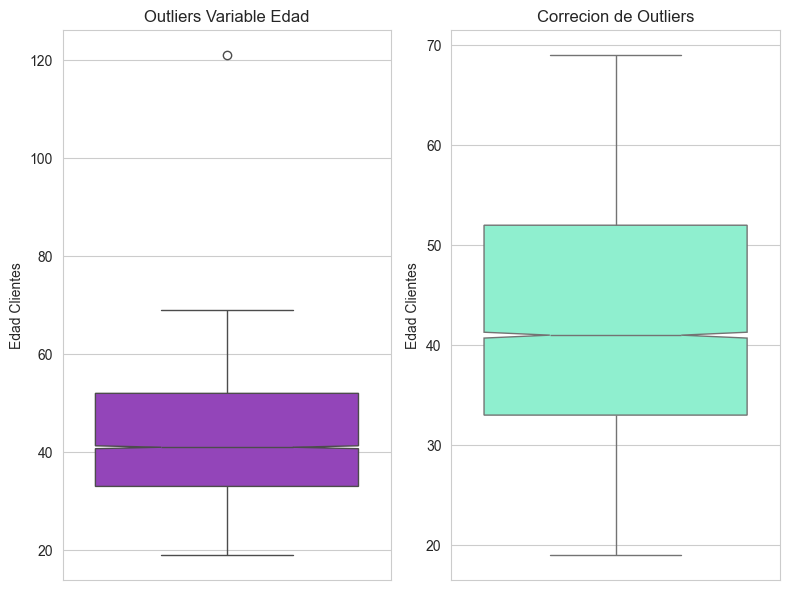

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))

# Outliers de la variable
sns.boxplot(df['edad_cliente'], ax=ax[0],color='darkorchid', notch=True)
ax[0].set_title('Outliers Variable Edad')
ax[0].set_ylabel('Edad Clientes')

# Aplicamos la lógica de negocio para filtrar el rango [18Años - 80Años]
df['edad_cliente'] = df['edad_cliente'].apply(lambda x: x if (x is not None and 18 <= x <= 80) else np.nan)

# Correcion de Outliers
sns.boxplot(df['edad_cliente'], ax=ax[1],color='aquamarine', notch=True)
ax[1].set_title('Correcion de Outliers')
ax[1].set_ylabel('Edad Clientes')

plt.tight_layout()
plt.show()

### SALARIO CLIENTE

In [240]:
# Revisamos los percentiles mas cercanos al 100% para ver donde se eleva mas
print(df['salario_cliente'].quantile([0.75, 0.90, 0.95, 0.99]))

0.75     4769250.0
0.90     7000000.0
0.95    10000000.0
0.99    20000000.0
Name: salario_cliente, dtype: float64


In [241]:
# Verificamos las personas con altos ingresos
personas_con_altos_ingresos = (df['salario_cliente'] > 10000000).sum()
porcentaje_personas_con_altos_ingresos = ((((df['salario_cliente'] > 10000000).sum())/len(df))*100).round(1)
print(f"Cantidad de personas con ingresos superiores a 10M: {personas_con_altos_ingresos}")
print(f"Porcentaje de Personas con ingresos superiores a 10M: {porcentaje_personas_con_altos_ingresos}%")

Cantidad de personas con ingresos superiores a 10M: 404
Porcentaje de Personas con ingresos superiores a 10M: 3.9%


Tenemos unos valores demasiado atipicos, primeramente tenemos valores en 0 es decir personas que no tienen. Ademas, hay salarios de mas de 10.000.000.000 lo cual es absurdo para un salario. Estos valores los inputaremos porque nos pueden dañar el estudio. Tomando en cuenta el Salario Minimo de Colombia (2.000.000) usaremos 1.500.000 Como el ingreso minimo. Tomando en cuanta que los salarios estan demasiado inflados y solo el 4% de las personas ganan mas de 10M tomaremos los casos entre 1.5M y 10M

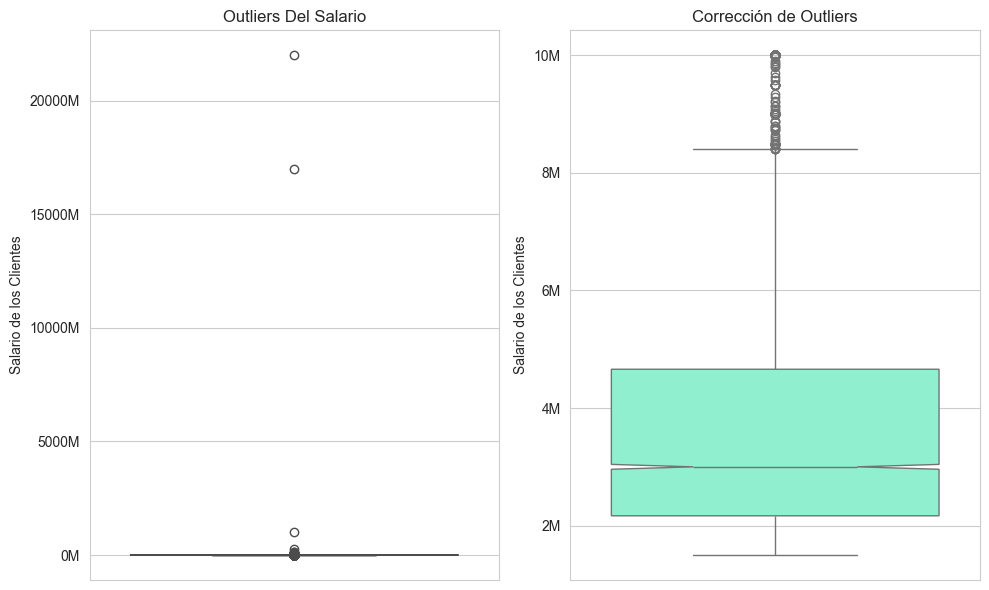

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 

# Outliers en la variable
sns.boxplot(y=df['salario_cliente'], ax=ax[0], color='darkorchid', notch=True)
ax[0].set_title('Outliers Del Salario')
ax[0].set_ylabel('Salario de los Clientes')

# Aplicamos la lógica de negocio para filtrar el rango [1.5M - 10M]
df['salario_cliente'] = df['salario_cliente'].apply(lambda x: x if (x is not None and 1500000 <= x <= 10000000) else np.nan)

# Correcion de Outliers
sns.boxplot(y=df['salario_cliente'], ax=ax[1], color='aquamarine', notch=True)
ax[1].set_title('Corrección de Outliers')
ax[1].set_ylabel('Salario de los Clientes')

# Aplicamos el formato de "M" a ambos subplots
formatter = ticker.FuncFormatter(millions_formatter) 
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### TOTAL OTROS PRESTAMOS

In [243]:
# Revisamos los percentiles mas cercanos al 100% para ver donde se eleva mas
print(df['total_otros_prestamos'].quantile([0.75, 0.90, 0.95, 0.99]))

0.75     2000000.0
0.90     3000000.0
0.95     4000000.0
0.99    10000000.0
Name: total_otros_prestamos, dtype: float64


In [244]:
# Verificamos la cantidad de personas con ingresos extremadamente altos
personas_con_otros_prestamos_altos = (df['total_otros_prestamos'] > 10000000).sum()
porcentaje_personas_con_otros_prestamos_altos = ((((df['total_otros_prestamos'] > 10000000).sum())/len(df))*100).round(1)
print(f"Cantidad de personas con otras deudas superiores a 10M: {personas_con_otros_prestamos_altos}")
print(f"Porcentaje de Personas con otras deudas superiores a 10M: {porcentaje_personas_con_otros_prestamos_altos}%")

Cantidad de personas con otras deudas superiores a 10M: 84
Porcentaje de Personas con otras deudas superiores a 10M: 0.8%


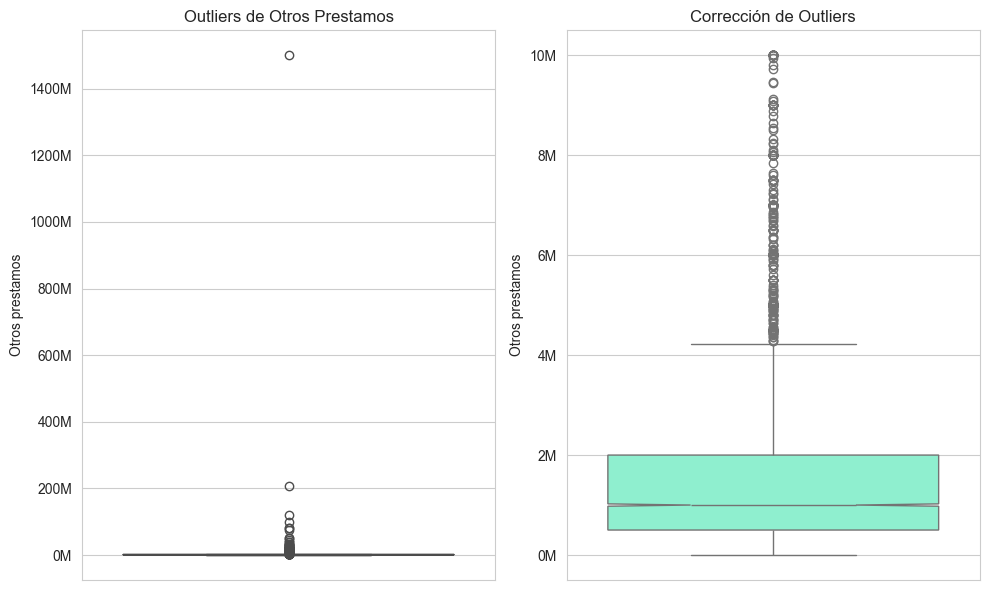

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 

# Outliers en la variable 
sns.boxplot(y=df['total_otros_prestamos'], ax=ax[0], color='darkorchid', notch=True)
ax[0].set_title('Outliers de Otros Prestamos')
ax[0].set_ylabel('Otros prestamos')

# Aplicamos la lógica de negocio para filtrar el rango [0 - 10M] 
df['total_otros_prestamos'] = df['total_otros_prestamos'].apply(lambda x: x if (x is not None and 0 <= x <= 10000000) else np.nan)

# Correcion de Outliers
sns.boxplot(y=df['total_otros_prestamos'], ax=ax[1], color='aquamarine', notch=True)
ax[1].set_title('Corrección de Outliers')
ax[1].set_ylabel('Otros prestamos')

# Aplicamos el formato de "M" a ambos subplots
formatter = ticker.FuncFormatter(millions_formatter)
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### CAPITAL PRESTADO

In [246]:
# Revisamos los percentiles mas cercanos al 100% para ver donde se eleva mas
print(df['capital_prestado'].quantile([0.75, 0.90, 0.95, 0.99]))

0.75    3056040.00
0.90    4399968.36
0.95    5746278.00
0.99    8640000.00
Name: capital_prestado, dtype: float64


In [247]:
# Verificamos las personas con un capital prestado extremadamente alto
personas_con_grandes_deudas = (df['capital_prestado'] > 8000000).sum()
porcentaje_personas_con_grandes_deudas = ((((df['capital_prestado'] > 8000000).sum())/len(df))*100).round(1)
print(f"Cantidad de personas con deudas superiores a 8M: {personas_con_grandes_deudas}")
print(f"Porcentaje de Personas con deudas superiores a 8M: {porcentaje_personas_con_grandes_deudas}%")

Cantidad de personas con deudas superiores a 8M: 183
Porcentaje de Personas con deudas superiores a 8M: 1.8%


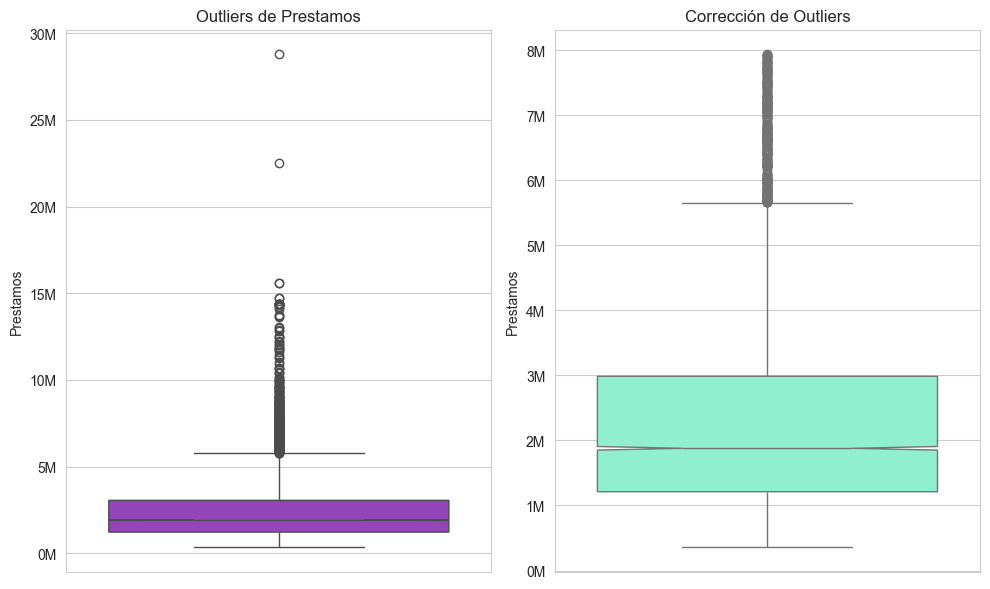

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 

# Outliers en la variable
sns.boxplot(y=df['capital_prestado'], ax=ax[0], color='darkorchid', notch=True)
ax[0].set_title('Outliers de Prestamos')
ax[0].set_ylabel('Prestamos')

# Aplicamos la lógica de negocio para filtrar el rango [0 - 8M] 
df['capital_prestado'] = df['capital_prestado'].apply(lambda x: x if (x is not None and 0 <= x <= 8000000) else np.nan)

# Correcion de Outliers
sns.boxplot(y=df['capital_prestado'], ax=ax[1], color='aquamarine', notch=True)
ax[1].set_title('Corrección de Outliers')
ax[1].set_ylabel('Prestamos')

# Aplicamos el formato de "M" a ambos subplots
formatter = ticker.FuncFormatter(millions_formatter) # Ticker se usa para personalizar los formatos
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### CUOTA PACTADA

In [249]:
# Revisamos los percentiles mas cercanos al 100% para ver donde se eleva mas
print(df['cuota_pactada'].quantile([0.75, 0.90, 0.95, 0.97, 0.98, 0.99]))

0.75     284655.75
0.90     464977.70
0.95     592453.00
0.97     688793.36
0.98     832612.34
0.99    1082840.60
Name: cuota_pactada, dtype: float64


In [250]:
# Verificamos las personas con un capital prestado extremadamente alto
personas_con_altas_cuotas = (df['cuota_pactada'] > 850000).sum()
porcentaje_personas_con_altas_cuotas = ((((df['cuota_pactada'] > 850000).sum())/len(df))*100).round(1)
print(f"Cantidad de personas con cuotas superiores a 850.000: {personas_con_altas_cuotas}")
print(f"Porcentaje de Personas con cuotas superiores a 850.000: {porcentaje_personas_con_altas_cuotas}%")

Cantidad de personas con cuotas superiores a 850.000: 198
Porcentaje de Personas con cuotas superiores a 850.000: 1.9%


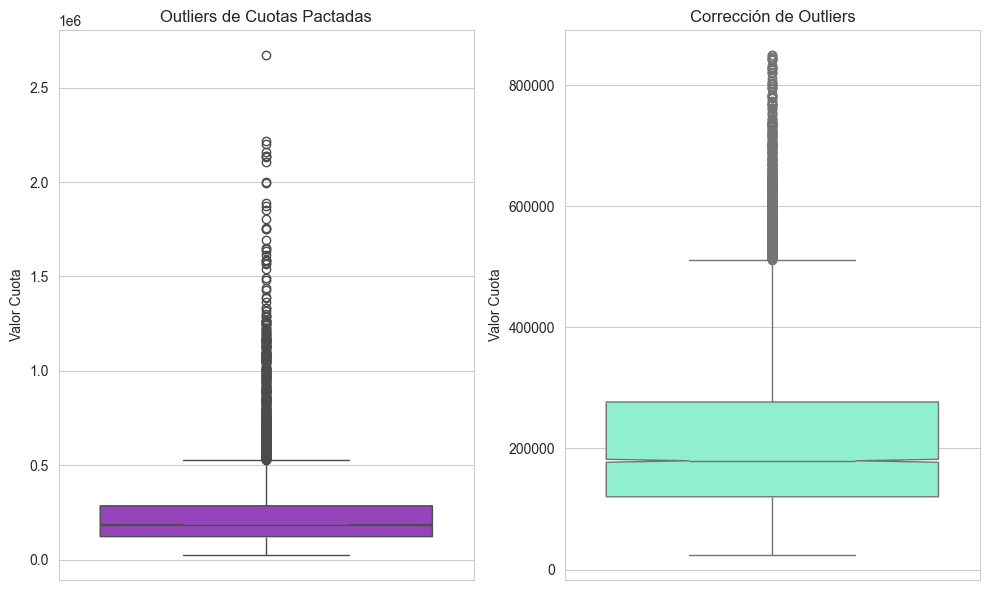

In [251]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 

# Outliers en la variable
sns.boxplot(y=df['cuota_pactada'], ax=ax[0], color='darkorchid', notch=True)
ax[0].set_title('Outliers de Cuotas Pactadas')
ax[0].set_ylabel('Valor Cuota')

# Aplicamos la lógica de negocio para filtrar el rango [0 - 80M] 
df['cuota_pactada'] = df['cuota_pactada'].apply(lambda x: x if (x is not None and 0 <= x <= 850000) else np.nan)

# Correcion de Outliers
sns.boxplot(y=df['cuota_pactada'], ax=ax[1], color='aquamarine', notch=True)
ax[1].set_title('Corrección de Outliers')
ax[1].set_ylabel('Valor Cuota')

plt.tight_layout()
plt.show()

In [252]:
###### NULOS ######
print("Nulos del Dataframe sin outliers: \n")
print(df.isnull().sum())

df.dropna(inplace=True)

Nulos del Dataframe sin outliers: 

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                  183
plazo_meses                         0
edad_cliente                        1
tipo_laboral                        0
salario_cliente                  1421
total_otros_prestamos              84
cuota_pactada                     198
puntaje                             0
puntaje_datacredito                 0
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                          0
saldo_total                         0
saldo_principal                     0
saldo_mora_codeudor                 0
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito       0
tendencia_ingresos                  0
Pago_atiempo                        0
dtype: int64


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   8711 non-null   int64         
 1   fecha_prestamo                 8711 non-null   datetime64[ns]
 2   capital_prestado               8711 non-null   float64       
 3   plazo_meses                    8711 non-null   int64         
 4   edad_cliente                   8711 non-null   float64       
 5   tipo_laboral                   8711 non-null   object        
 6   salario_cliente                8711 non-null   float64       
 7   total_otros_prestamos          8711 non-null   float64       
 8   cuota_pactada                  8711 non-null   float64       
 9   puntaje                        8711 non-null   float64       
 10  puntaje_datacredito            8711 non-null   float64       
 11  cant_creditosvigentes

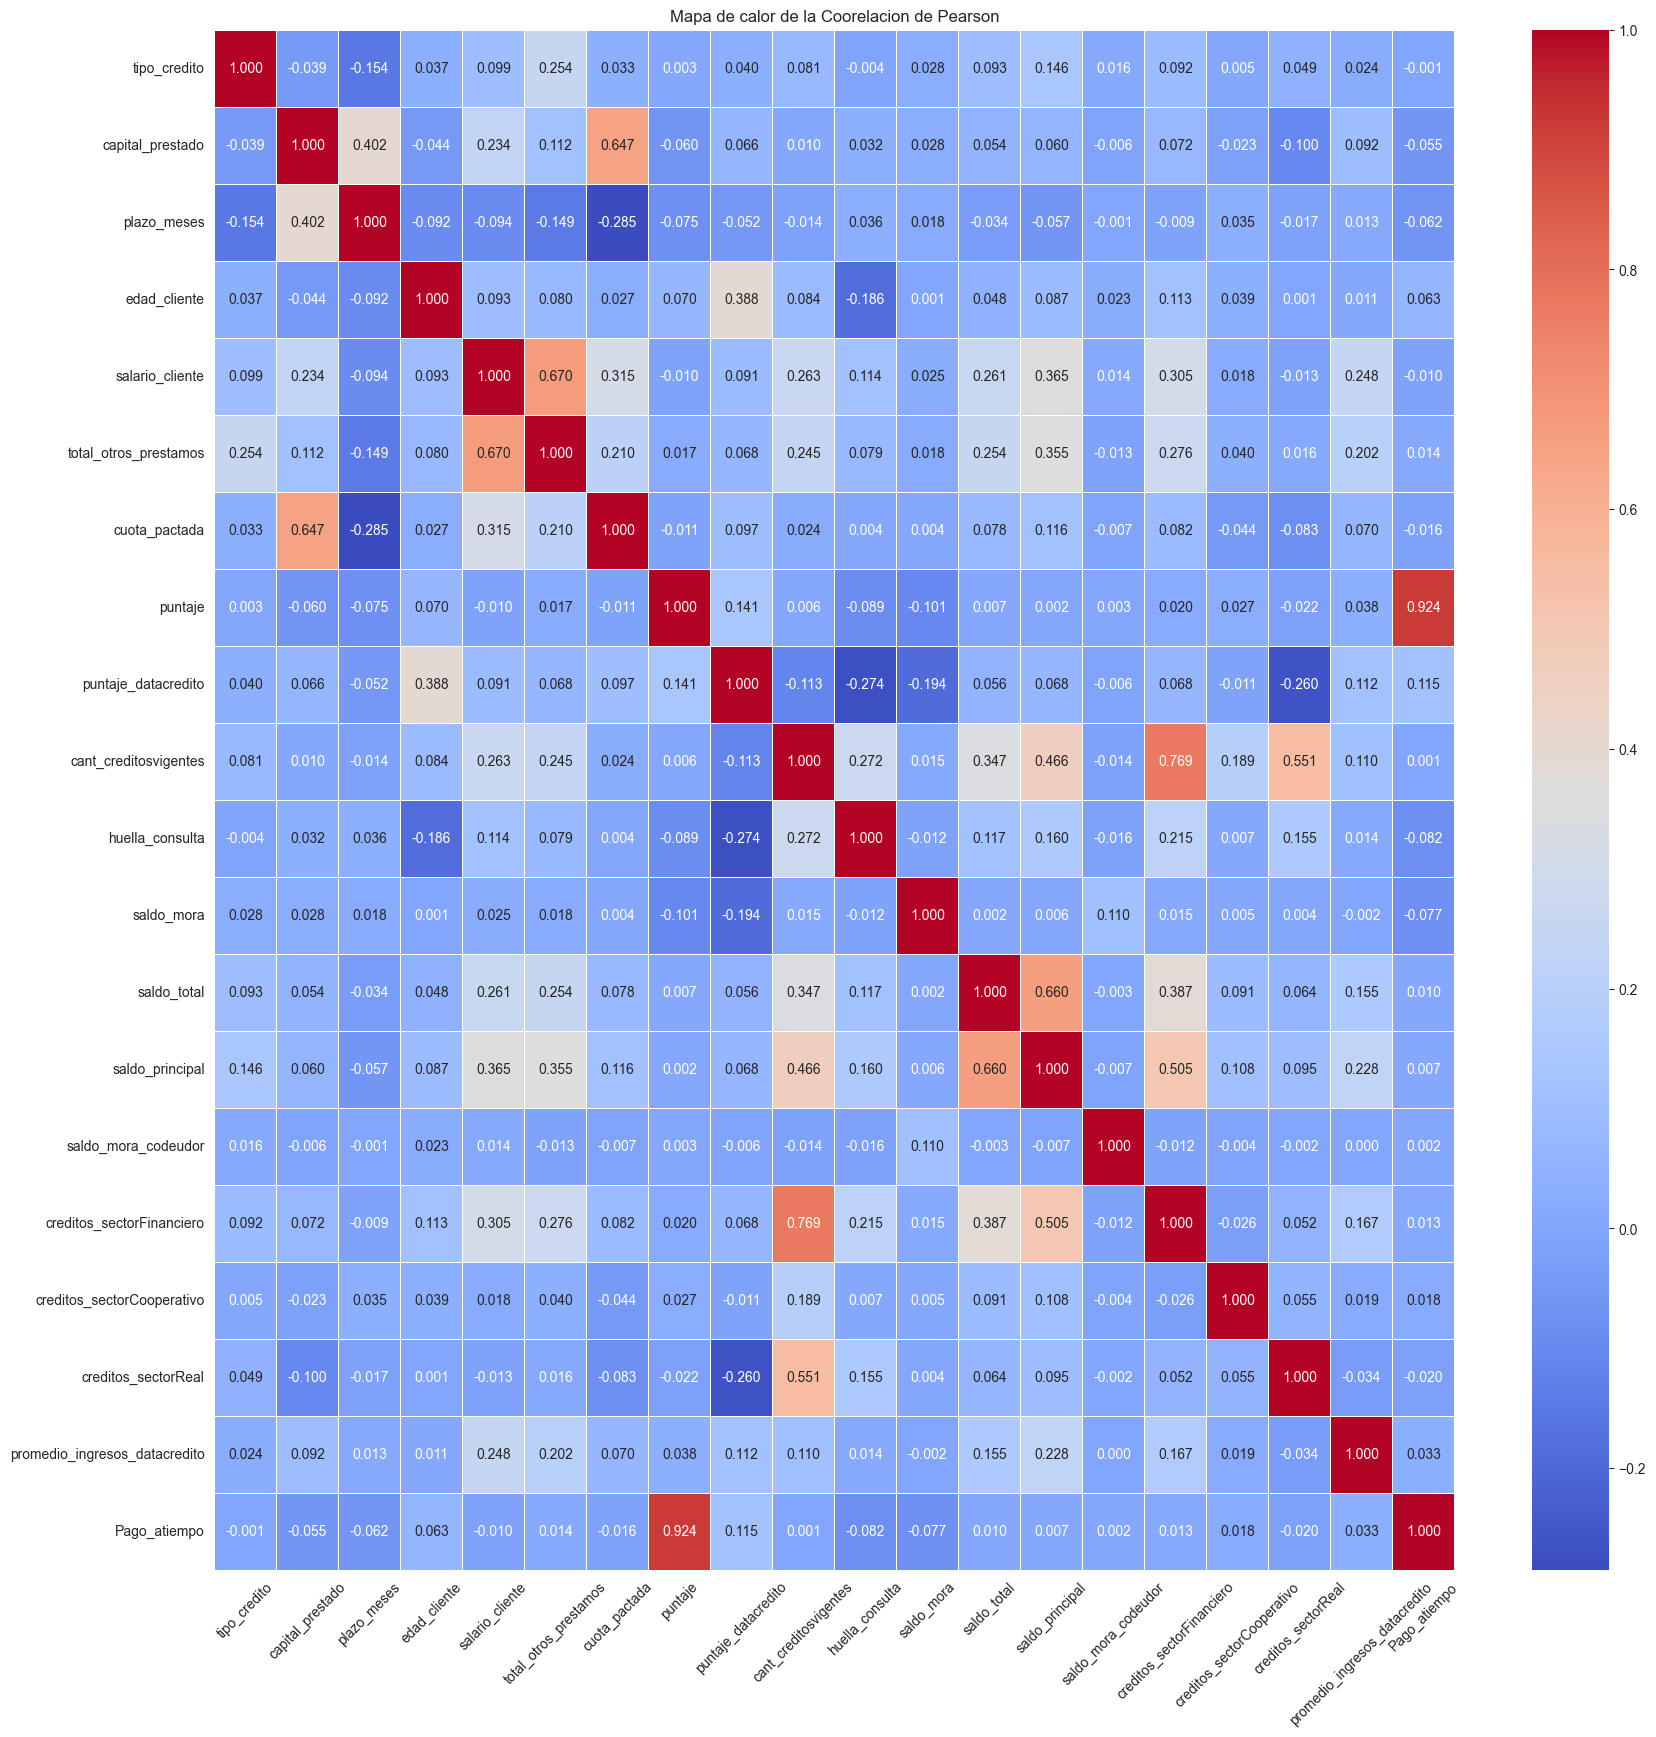

In [254]:
# Calculamos la coorelacion de Pearson
pearson = df.select_dtypes('number').corr(method='pearson')

# Inicializamos la figura para crear un mapa de calor
plt.figure(figsize=(20,20))
sns.heatmap(
    pearson, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    fmt='.3f')

# Vizualizacion del Heatmap
plt.title('Mapa de calor de la Coorelacion de Pearson')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Despues de ver el mapa de calor nos damos cuenta que realmente hay algunas variables que o son muy parecidas a otras o no nos aportan nada de coorelacion al estudio
variables_innecesarias = ['fecha_prestamo', 'tipo_credito', 'huella_consulta', 'promedio_ingresos_datacredito', 'saldo_mora', 'saldo_mora_codeudor', 'puntaje', 'creditos_sectorFinanciero', 'saldo_principal']

df.drop(columns=variables_innecesarias, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 0 to 10762
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   capital_prestado            8711 non-null   float64
 1   plazo_meses                 8711 non-null   int64  
 2   edad_cliente                8711 non-null   float64
 3   tipo_laboral                8711 non-null   object 
 4   salario_cliente             8711 non-null   float64
 5   total_otros_prestamos       8711 non-null   float64
 6   cuota_pactada               8711 non-null   float64
 7   puntaje_datacredito         8711 non-null   float64
 8   cant_creditosvigentes       8711 non-null   int64  
 9   saldo_total                 8711 non-null   float64
 10  creditos_sectorCooperativo  8711 non-null   int64  
 11  creditos_sectorReal         8711 non-null   int64  
 12  tendencia_ingresos          8711 non-null   object 
 13  Pago_atiempo                8711 non-

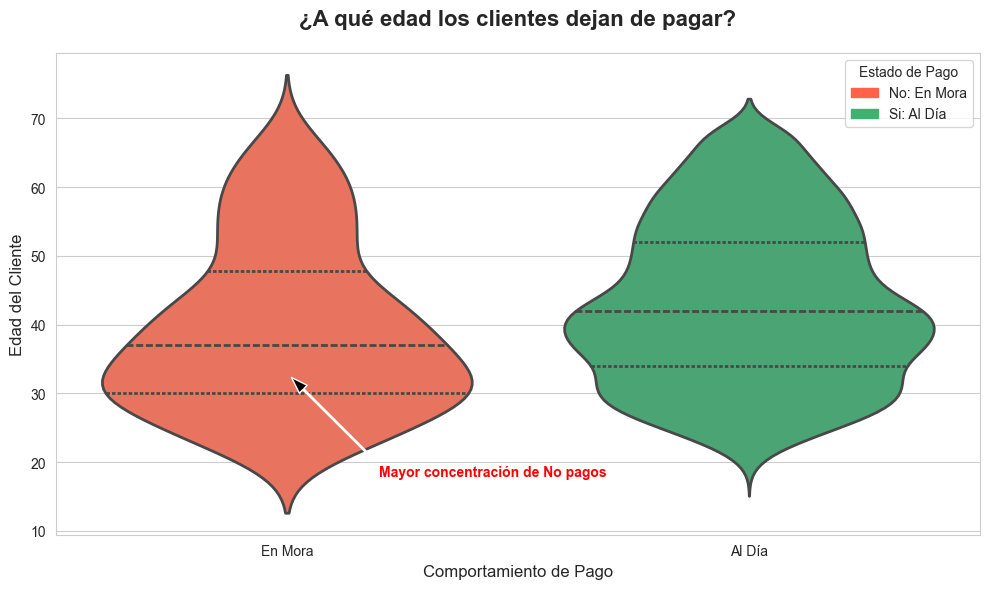

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Creamos un violinplot 
# La paleta es roja para los casos negativos y verde para los positivos
ax = sns.violinplot(
    data=df, 
    y='edad_cliente', 
    x='Pago_atiempo', 
    palette={'0': "tomato", '1': "mediumseagreen"}, 
    inner="quartile", 
    linewidth=2, 
    legend=False
)

# Para facilitar la personalizacion de las paletas importamos de la libreria matplotlib mpatches
red_patch = mpatches.Patch(color='#FF6347', label='No: En Mora')
blue_patch = mpatches.Patch(color='#3cb371', label='Si: Al Día')
plt.legend(handles=[red_patch, blue_patch], title="Estado de Pago", loc='upper right')

# Creamos los titulos
plt.title('¿A qué edad los clientes pagan menos?', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Comportamiento de Pago', fontsize=12)
plt.ylabel('Edad del Cliente', fontsize=12)
ax.set_xticklabels(['En Mora', 'Al Día']) 

# Creamos una flecha para mostrar la mayor concentracion de NO pagos
ax.annotate(
    'Mayor concentración de No pagos', 
    xy=(0, 33), 
    xytext=(0.2, 18), 
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=10, 
    color='red', 
    fontweight='bold'
)

plt.tight_layout()
plt.show()